# Loading and Understanding the dataset

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore any warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Print the first five rows of the dataset
data.head()

patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2      1                 0       0  
3      2                 2       1  
4      3                 2       1

In [3]:
# Shape of the dataset (rows and columns)
shape_info = data.shape
print("The shape of the dataset is: ", shape_info)

The shape of the dataset is:  (1000, 14)


In [4]:
# Data types of each column
data_types = data.dtypes
print("Data Types")
print(data_types)

Data Types
patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object


In [5]:
# Unique values of each column
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
patientid                  1000
age                          61
gender                        2
chestpain                     4
restingBP                    95
serumcholestrol             344
fastingbloodsugar             2
restingrelectro               3
maxheartrate                129
exerciseangia                 2
oldpeak                      63
slope                         4
noofmajorvessels              4
target                        2

In [6]:
# Separating the columns in categorical and continuous
cat_cols = ['gender','chestpain','fastingbloodsugar','restingrelectro','exerciseangia','slope','noofmajorvessels']
con_cols = ['age','restingBP','serumcholestrol','maxheartrate','oldpeak']
target_col = ['target']
print("The categorial columns are : ", cat_cols)
print("The continuous columns are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
The continuous columns are :  ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
The target variable is :   ['target']


In [7]:
# Summary statistics
data[con_cols].describe().transpose()

count      mean         std   min     25%    50%     75%  \
age              1000.0   49.2420   17.864730  20.0   34.00   49.0   64.25   
restingBP        1000.0  151.7470   29.965228  94.0  129.00  147.0  181.00   
serumcholestrol  1000.0  311.4470  132.443801   0.0  235.75  318.0  404.25   
maxheartrate     1000.0  145.4770   34.190268  71.0  119.75  146.0  175.00   
oldpeak          1000.0    2.7077    1.720753   0.0    1.30    2.4    4.10   

                   max  
age               80.0  
restingBP        200.0  
serumcholestrol  602.0  
maxheartrate     202.0  
oldpeak            6.2

In [8]:
# Summary statistics
data[cat_cols].describe().transpose()

count   mean       std  min  25%  50%  75%  max
gender             1000.0  0.765  0.424211  0.0  1.0  1.0  1.0  1.0
chestpain          1000.0  0.980  0.953157  0.0  0.0  1.0  2.0  3.0
fastingbloodsugar  1000.0  0.296  0.456719  0.0  0.0  0.0  1.0  1.0
restingrelectro    1000.0  0.748  0.770123  0.0  0.0  1.0  1.0  2.0
exerciseangia      1000.0  0.498  0.500246  0.0  0.0  0.0  1.0  1.0
slope              1000.0  1.540  1.003697  0.0  1.0  2.0  2.0  3.0
noofmajorvessels   1000.0  1.222  0.977585  0.0  0.0  1.0  2.0  3.0

In [9]:
# Summary statistics
data[target_col].describe().transpose()

count  mean       std  min  25%  50%  75%  max
target  1000.0  0.58  0.493805  0.0  0.0  1.0  1.0  1.0

In [10]:
# Handling missing values for serumcholestrol
serum_chol_median = data[data['serumcholestrol'] > 0]['serumcholestrol'].median()
data['serumcholestrol'] = data['serumcholestrol'].replace(0, serum_chol_median)
print(serum_chol_median)

326.0


In [11]:
# Summary statistics
data[con_cols].describe().transpose()

count      mean         std   min     25%    50%     75%  \
age              1000.0   49.2420   17.864730  20.0   34.00   49.0   64.25   
restingBP        1000.0  151.7470   29.965228  94.0  129.00  147.0  181.00   
serumcholestrol  1000.0  328.7250  110.034826  85.0  249.00  326.0  404.25   
maxheartrate     1000.0  145.4770   34.190268  71.0  119.75  146.0  175.00   
oldpeak          1000.0    2.7077    1.720753   0.0    1.30    2.4    4.10   

                   max  
age               80.0  
restingBP        200.0  
serumcholestrol  602.0  
maxheartrate     202.0  
oldpeak            6.2

In [12]:
# Checking for any missing values
data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [13]:
# Checking for any duplicated rows
data[data.duplicated()]

Empty DataFrame
Columns: [patientid, age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels, target]
Index: []

# Exploratory Data Analysis

## Univariate Data Analysis

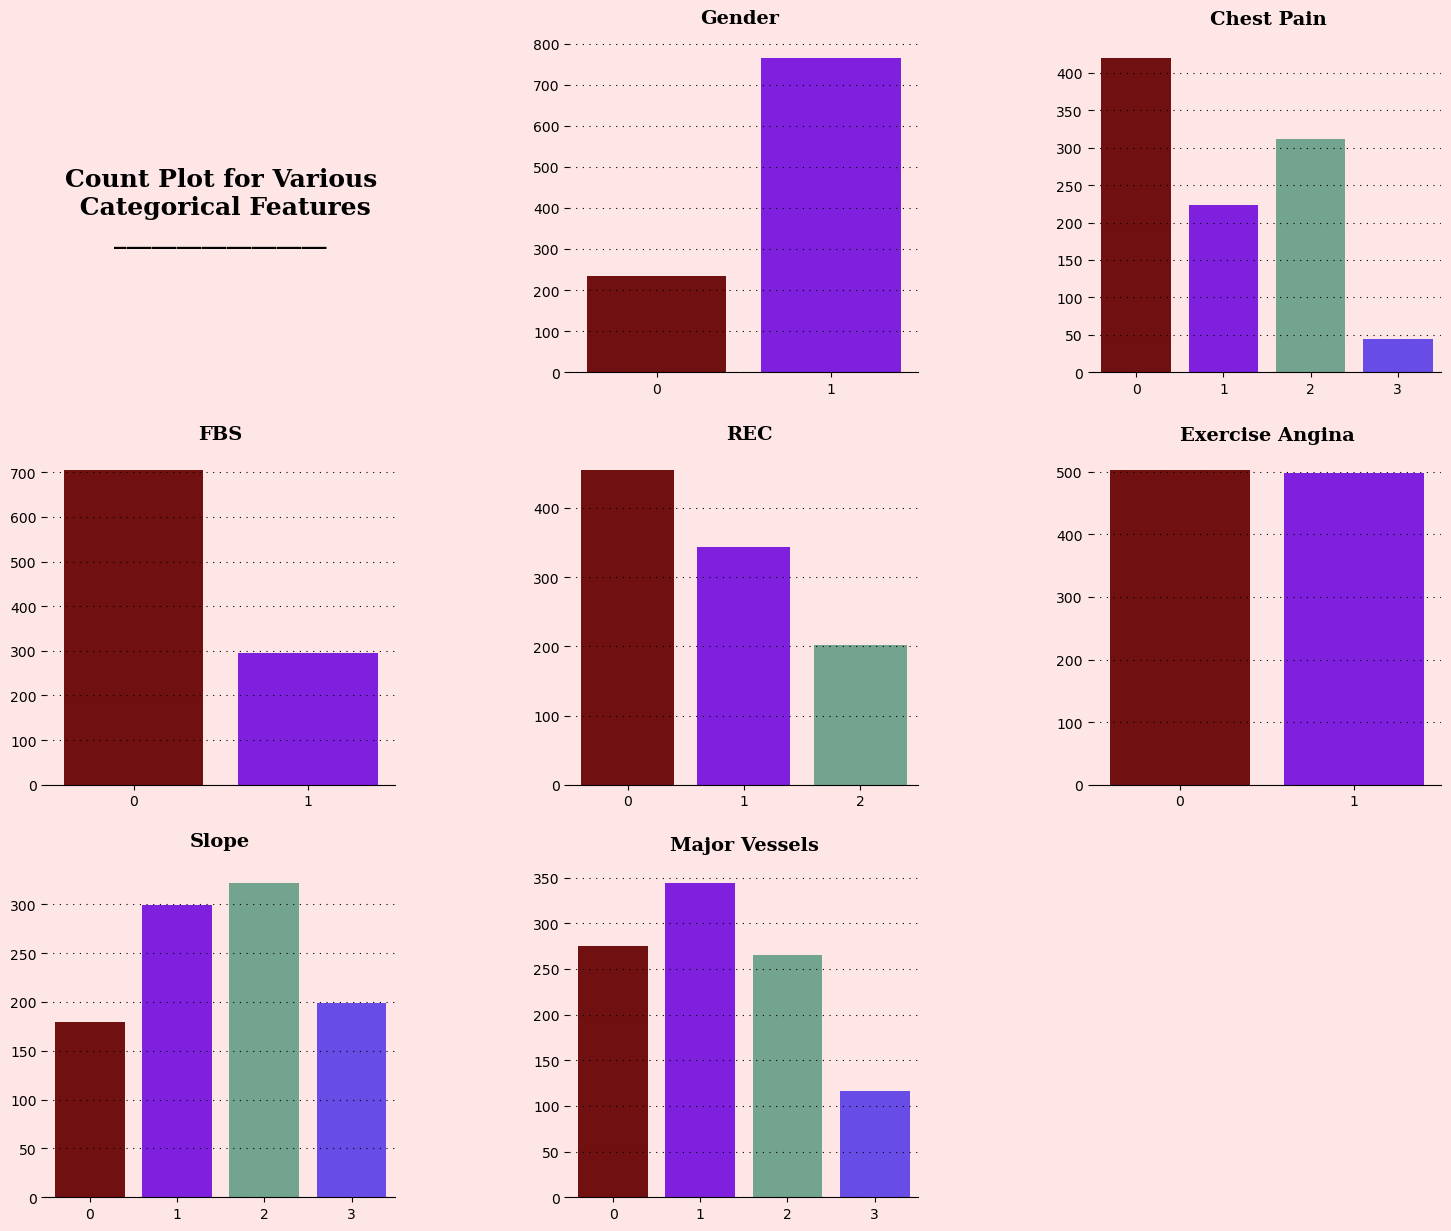

In [14]:
# Count plot of categorical features
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count Plot for Various\n Categorical Features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Gender count
ax1.text(0.25, 850, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data,x='gender',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Chest Pain count
ax2.text(0.85, 465, 'Chest Pain', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data,x='chestpain',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fasting Blood Sugar count
ax3.text(0.37, 775, 'FBS', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data,x='fastingbloodsugar',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Resting Electro count
ax4.text(0.85, 500, 'REC', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data,x='restingrelectro',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exercise Angina count
ax5.text(0, 550, 'Exercise Angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='exerciseangia',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slope count
ax6.text(1.15, 360, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='slope',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Major Vessels count
ax7.text(0.65, 380, 'Major Vessels', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='noofmajorvessels',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

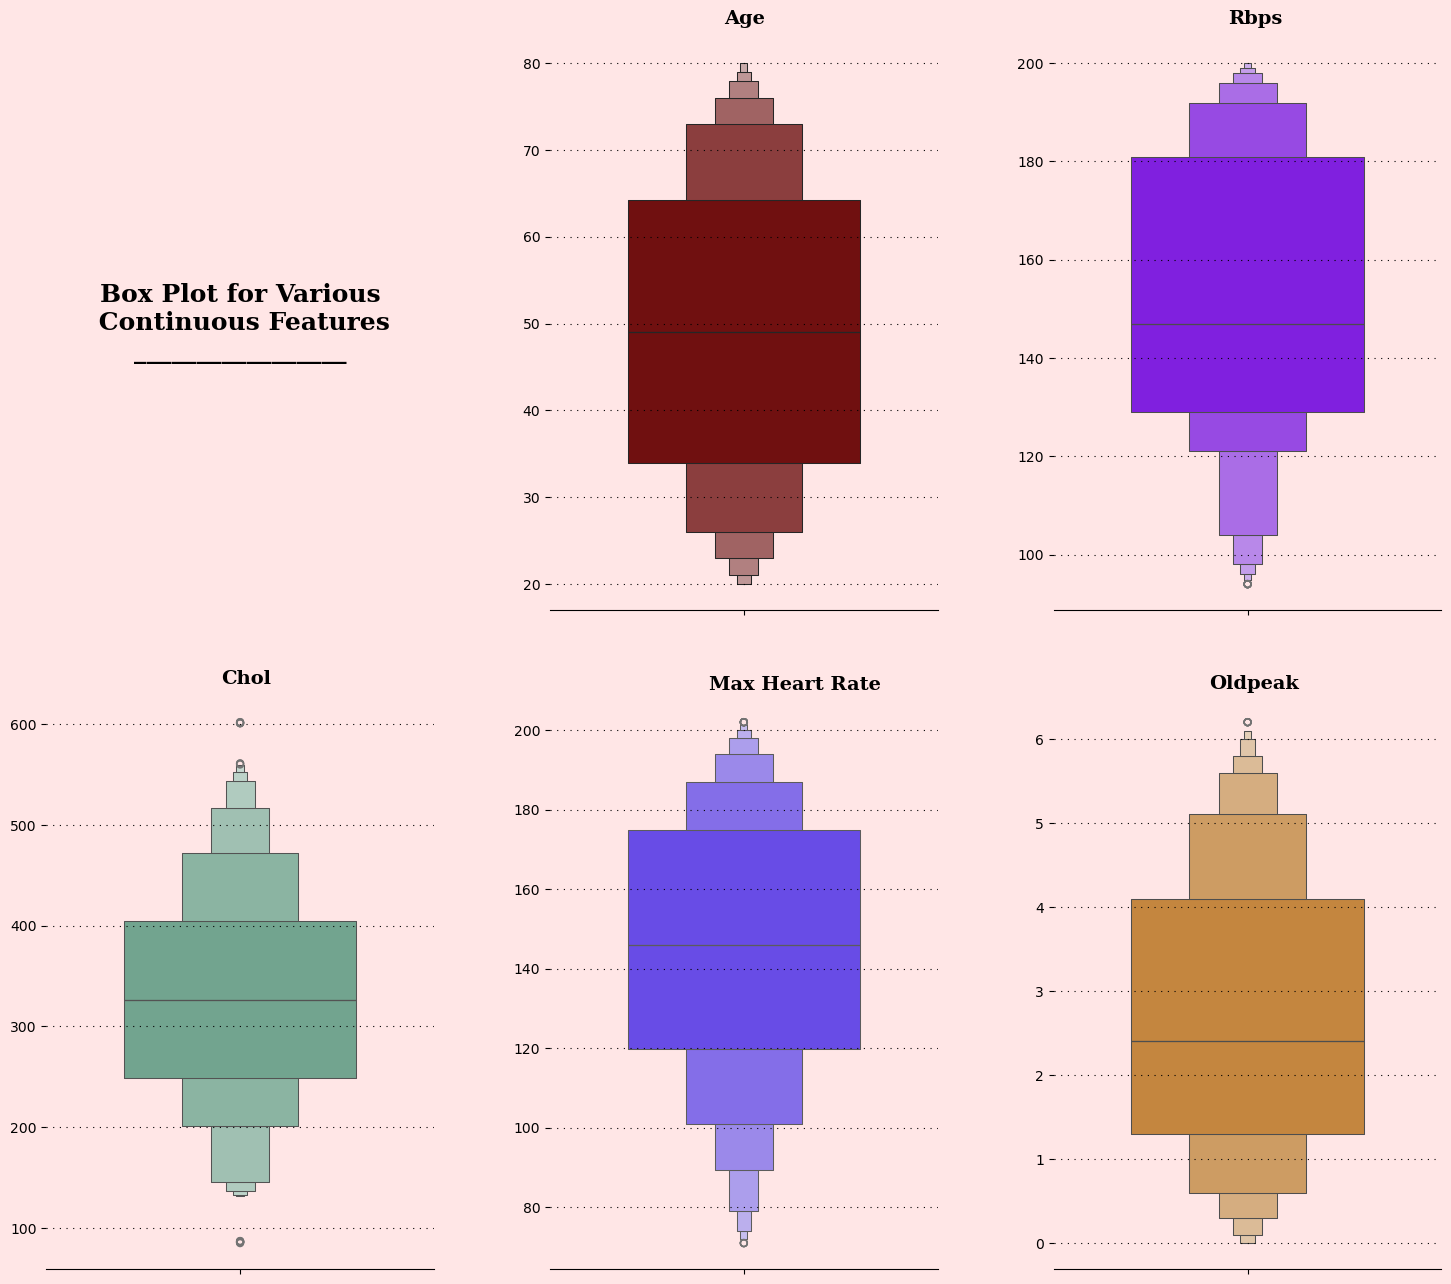

In [15]:
# Box plot of continuos features
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box Plot for Various\n Continuous Features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 84.5, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting BP 
ax2.text(-0.05, 208, 'Rbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=data['restingBP'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Serum Cholestrol 
ax3.text(-0.05, 640, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=data['serumcholestrol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Max Heart Rate 
ax4.text(-0.09, 210, 'Max Heart Rate', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=data['maxheartrate'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=data['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

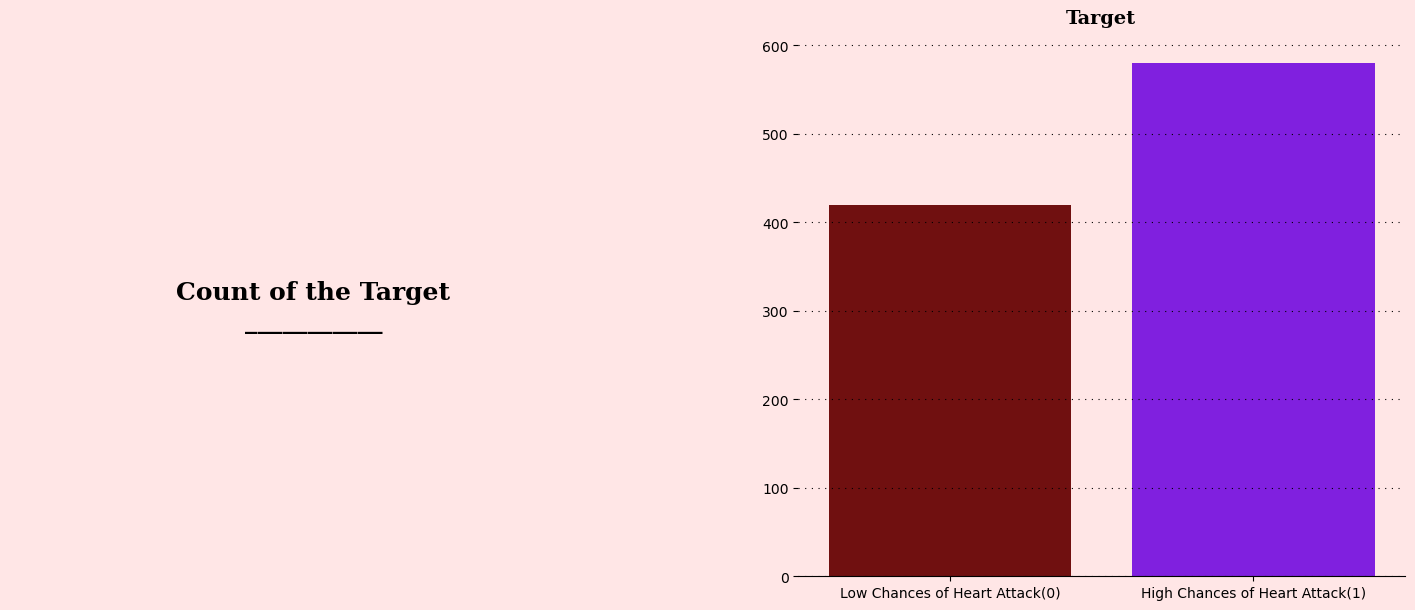

In [16]:
# Count plot of the target
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the Target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.38,625,"Target",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=data, x = 'target',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low Chances of Heart Attack(0)","High Chances of Heart Attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

## Bivariate Analysis

In [17]:
data_corr = data[con_cols].corr().transpose()
data_corr

age  restingBP  serumcholestrol  maxheartrate   oldpeak
age              1.000000  -0.016126         0.033388     -0.040092 -0.026020
restingBP       -0.016126   1.000000         0.215473      0.095569 -0.004225
serumcholestrol  0.033388   0.215473         1.000000      0.085304 -0.019998
maxheartrate    -0.040092   0.095569         0.085304      1.000000  0.044614
oldpeak         -0.026020  -0.004225        -0.019998      0.044614  1.000000

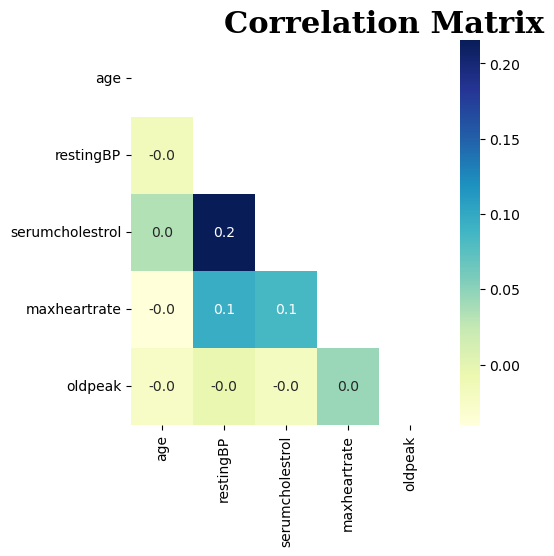

In [18]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
data_corr = data[con_cols].corr().transpose()
sns.heatmap(data_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [19]:
data_corr = data[cat_cols].corr().transpose()
data_corr

gender  chestpain  fastingbloodsugar  restingrelectro  \
gender             1.000000   0.035402           0.023560        -0.046634   
chestpain          0.035402   1.000000           0.232059         0.256316   
fastingbloodsugar  0.023560   0.232059           1.000000         0.143982   
restingrelectro   -0.046634   0.256316           0.143982         1.000000   
exerciseangia     -0.051746  -0.027376           0.011356        -0.032489   
slope             -0.051957   0.472731           0.242734         0.343280   
noofmajorvessels   0.029376   0.285156           0.182246         0.204684   

                   exerciseangia     slope  noofmajorvessels  
gender                 -0.051746 -0.051957          0.029376  
chestpain              -0.027376  0.472731          0.285156  
fastingbloodsugar       0.011356  0.242734          0.182246  
restingrelectro        -0.032489  0.343280          0.204684  
exerciseangia           1.000000 -0.017783         -0.017513  
slope                  -0.017783  1.000000          0.526536  
noofmajorvessels       -0.017513  0.526536          1.000000

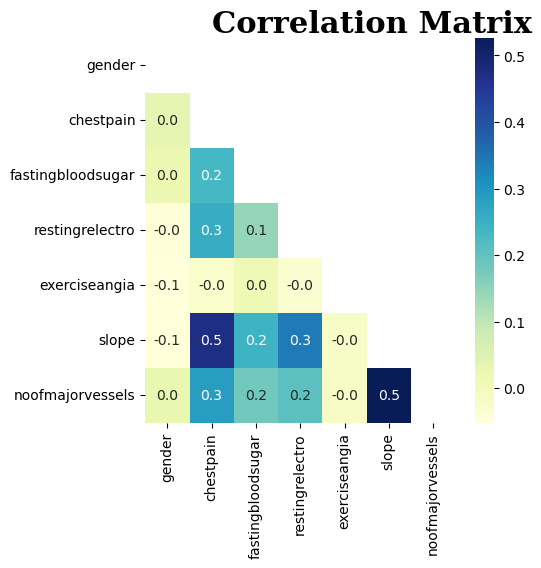

In [20]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
data_corr = data[cat_cols].corr().transpose()
sns.heatmap(data_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [21]:
data_corr = data.corr().transpose()
data_corr

patientid       age    gender  chestpain  restingBP  \
patientid           1.000000  0.004978 -0.031263  -0.009679  -0.020926   
age                 0.004978  1.000000 -0.024717   0.037731  -0.016126   
gender             -0.031263 -0.024717  1.000000   0.035402  -0.069727   
chestpain          -0.009679  0.037731  0.035402   1.000000   0.222267   
restingBP          -0.020926 -0.016126 -0.069727   0.222267   1.000000   
serumcholestrol     0.032201  0.033388 -0.142171   0.232282   0.215473   
fastingbloodsugar   0.022331  0.049732  0.023560   0.232059   0.192063   
restingrelectro    -0.003667  0.067736 -0.046634   0.256316   0.219887   
maxheartrate       -0.036486 -0.040092  0.064606   0.114496   0.095569   
exerciseangia       0.014338 -0.037581 -0.051746  -0.027376  -0.046545   
oldpeak            -0.013825 -0.026020  0.331457   0.101345  -0.004225   
slope              -0.010128 -0.015334 -0.051957   0.472731   0.376711   
noofmajorvessels    0.019465  0.025407  0.029376   0.285156   0.263194   
target             -0.005637  0.008356  0.015769   0.554228   0.482387   

                   serumcholestrol  fastingbloodsugar  restingrelectro  \
patientid                 0.032201           0.022331        -0.003667   
age                       0.033388           0.049732         0.067736   
gender                   -0.142171           0.023560        -0.046634   
chestpain                 0.232282           0.232059         0.256316   
restingBP                 0.215473           0.192063         0.219887   
serumcholestrol           1.000000           0.233153         0.185477   
fastingbloodsugar         0.233153           1.000000         0.143982   
restingrelectro           0.185477           0.143982         1.000000   
maxheartrate              0.085304           0.096528         0.099991   
exerciseangia             0.009365           0.011356        -0.032489   
oldpeak                  -0.019998           0.015311         0.040291   
slope                     0.297917           0.242734         0.343280   
noofmajorvessels          0.214702           0.182246         0.204684   
target                    0.368809           0.303233         0.426837   

                   maxheartrate  exerciseangia   oldpeak     slope  \
patientid             -0.036486       0.014338 -0.013825 -0.010128   
age                   -0.040092      -0.037581 -0.026020 -0.015334   
gender                 0.064606      -0.051746  0.331457 -0.051957   
chestpain              0.114496      -0.027376  0.101345  0.472731   
restingBP              0.095569      -0.046545 -0.004225  0.376711   
serumcholestrol        0.085304       0.009365 -0.019998  0.297917   
fastingbloodsugar      0.096528       0.011356  0.015311  0.242734   
restingrelectro        0.099991      -0.032489  0.040291  0.343280   
maxheartrate           1.000000       0.015536  0.044614  0.201515   
exerciseangia          0.015536       1.000000 -0.003296 -0.017783   
oldpeak                0.044614      -0.003296  1.000000  0.208789   
slope                  0.201515      -0.017783  0.208789  1.000000   
noofmajorvessels       0.122763      -0.017513  0.086992  0.526536   
target                 0.228343      -0.039874  0.098053  0.797358   

                   noofmajorvessels    target  
patientid                  0.019465 -0.005637  
age                        0.025407  0.008356  
gender                     0.029376  0.015769  
chestpain                  0.285156  0.554228  
restingBP                  0.263194  0.482387  
serumcholestrol            0.214702  0.368809  
fastingbloodsugar          0.182246  0.303233  
restingrelectro            0.204684  0.426837  
maxheartrate               0.122763  0.228343  
exerciseangia             -0.017513 -0.039874  
oldpeak                    0.086992  0.098053  
slope                      0.526536  0.797358  
noofmajorvessels           1.000000  0.489866  
target                     0.489866  1.000000

<Figure size 500x500 with 0 Axes>

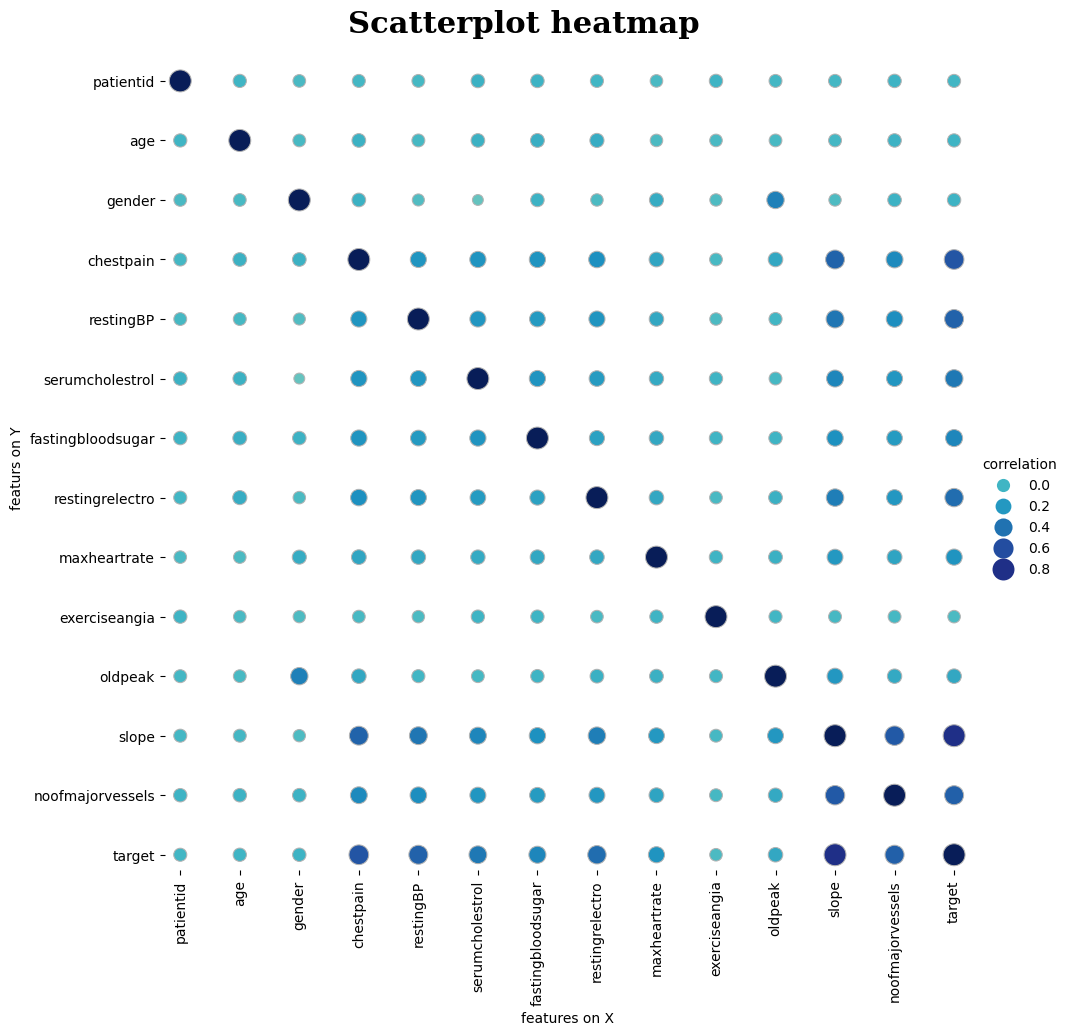

In [22]:
# Scatterlot heatmap of dataset
fig = plt.figure(figsize=(5,5))
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

for label in g.ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

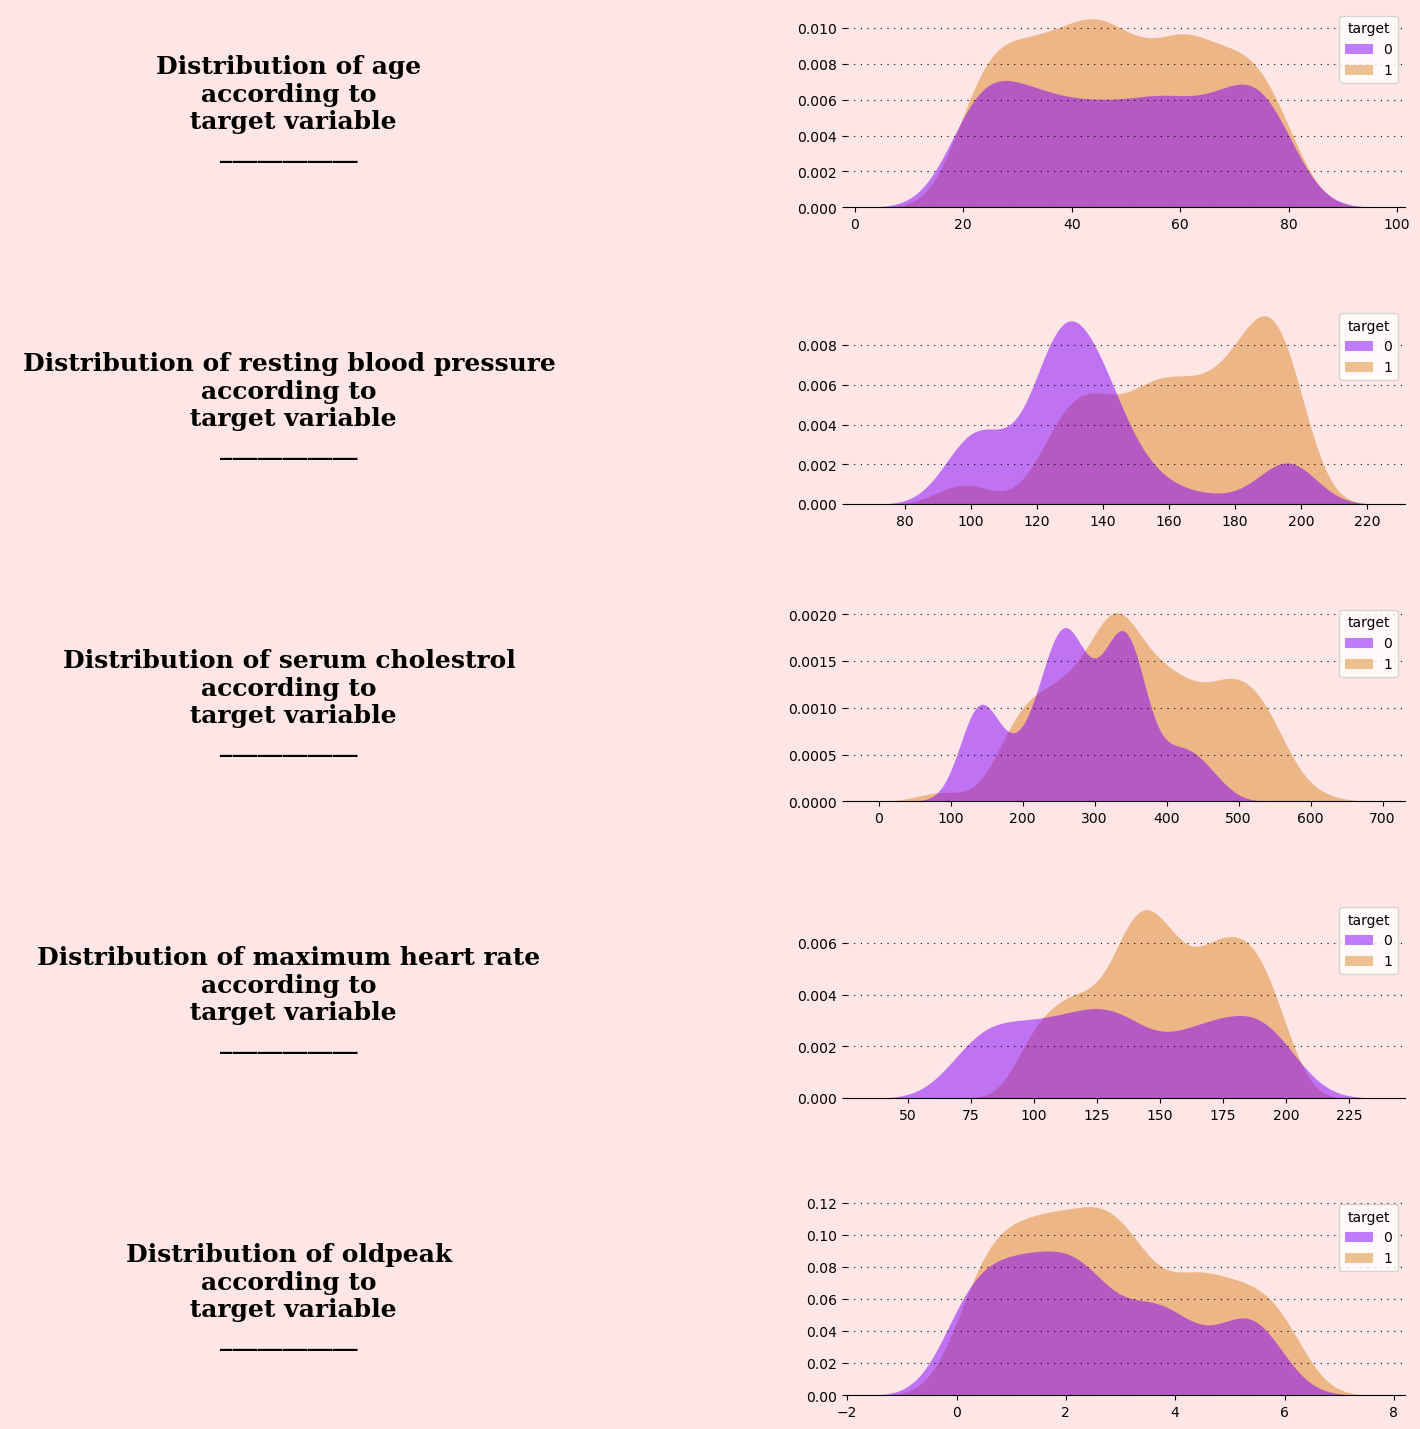

In [23]:
# con_cols = ['age','restingBP','serumcholestrol','maxheartrate','oldpeak']

# Distribution of continuous features according to target variable
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=data, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting Blood Pressure title
ax2.text(0.5,0.5,"Distribution of resting blood pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Resting Blood Pressure
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=data, x='restingBP',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Serum Cholestrol title
ax4.text(0.5,0.5,"Distribution of serum cholestrol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Serum Cholestrol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data, x='serumcholestrol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Maximum Heart Rate title
ax6.text(0.5,0.5,"Distribution of maximum heart rate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Maximum Heart Rate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='maxheartrate',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=data, x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

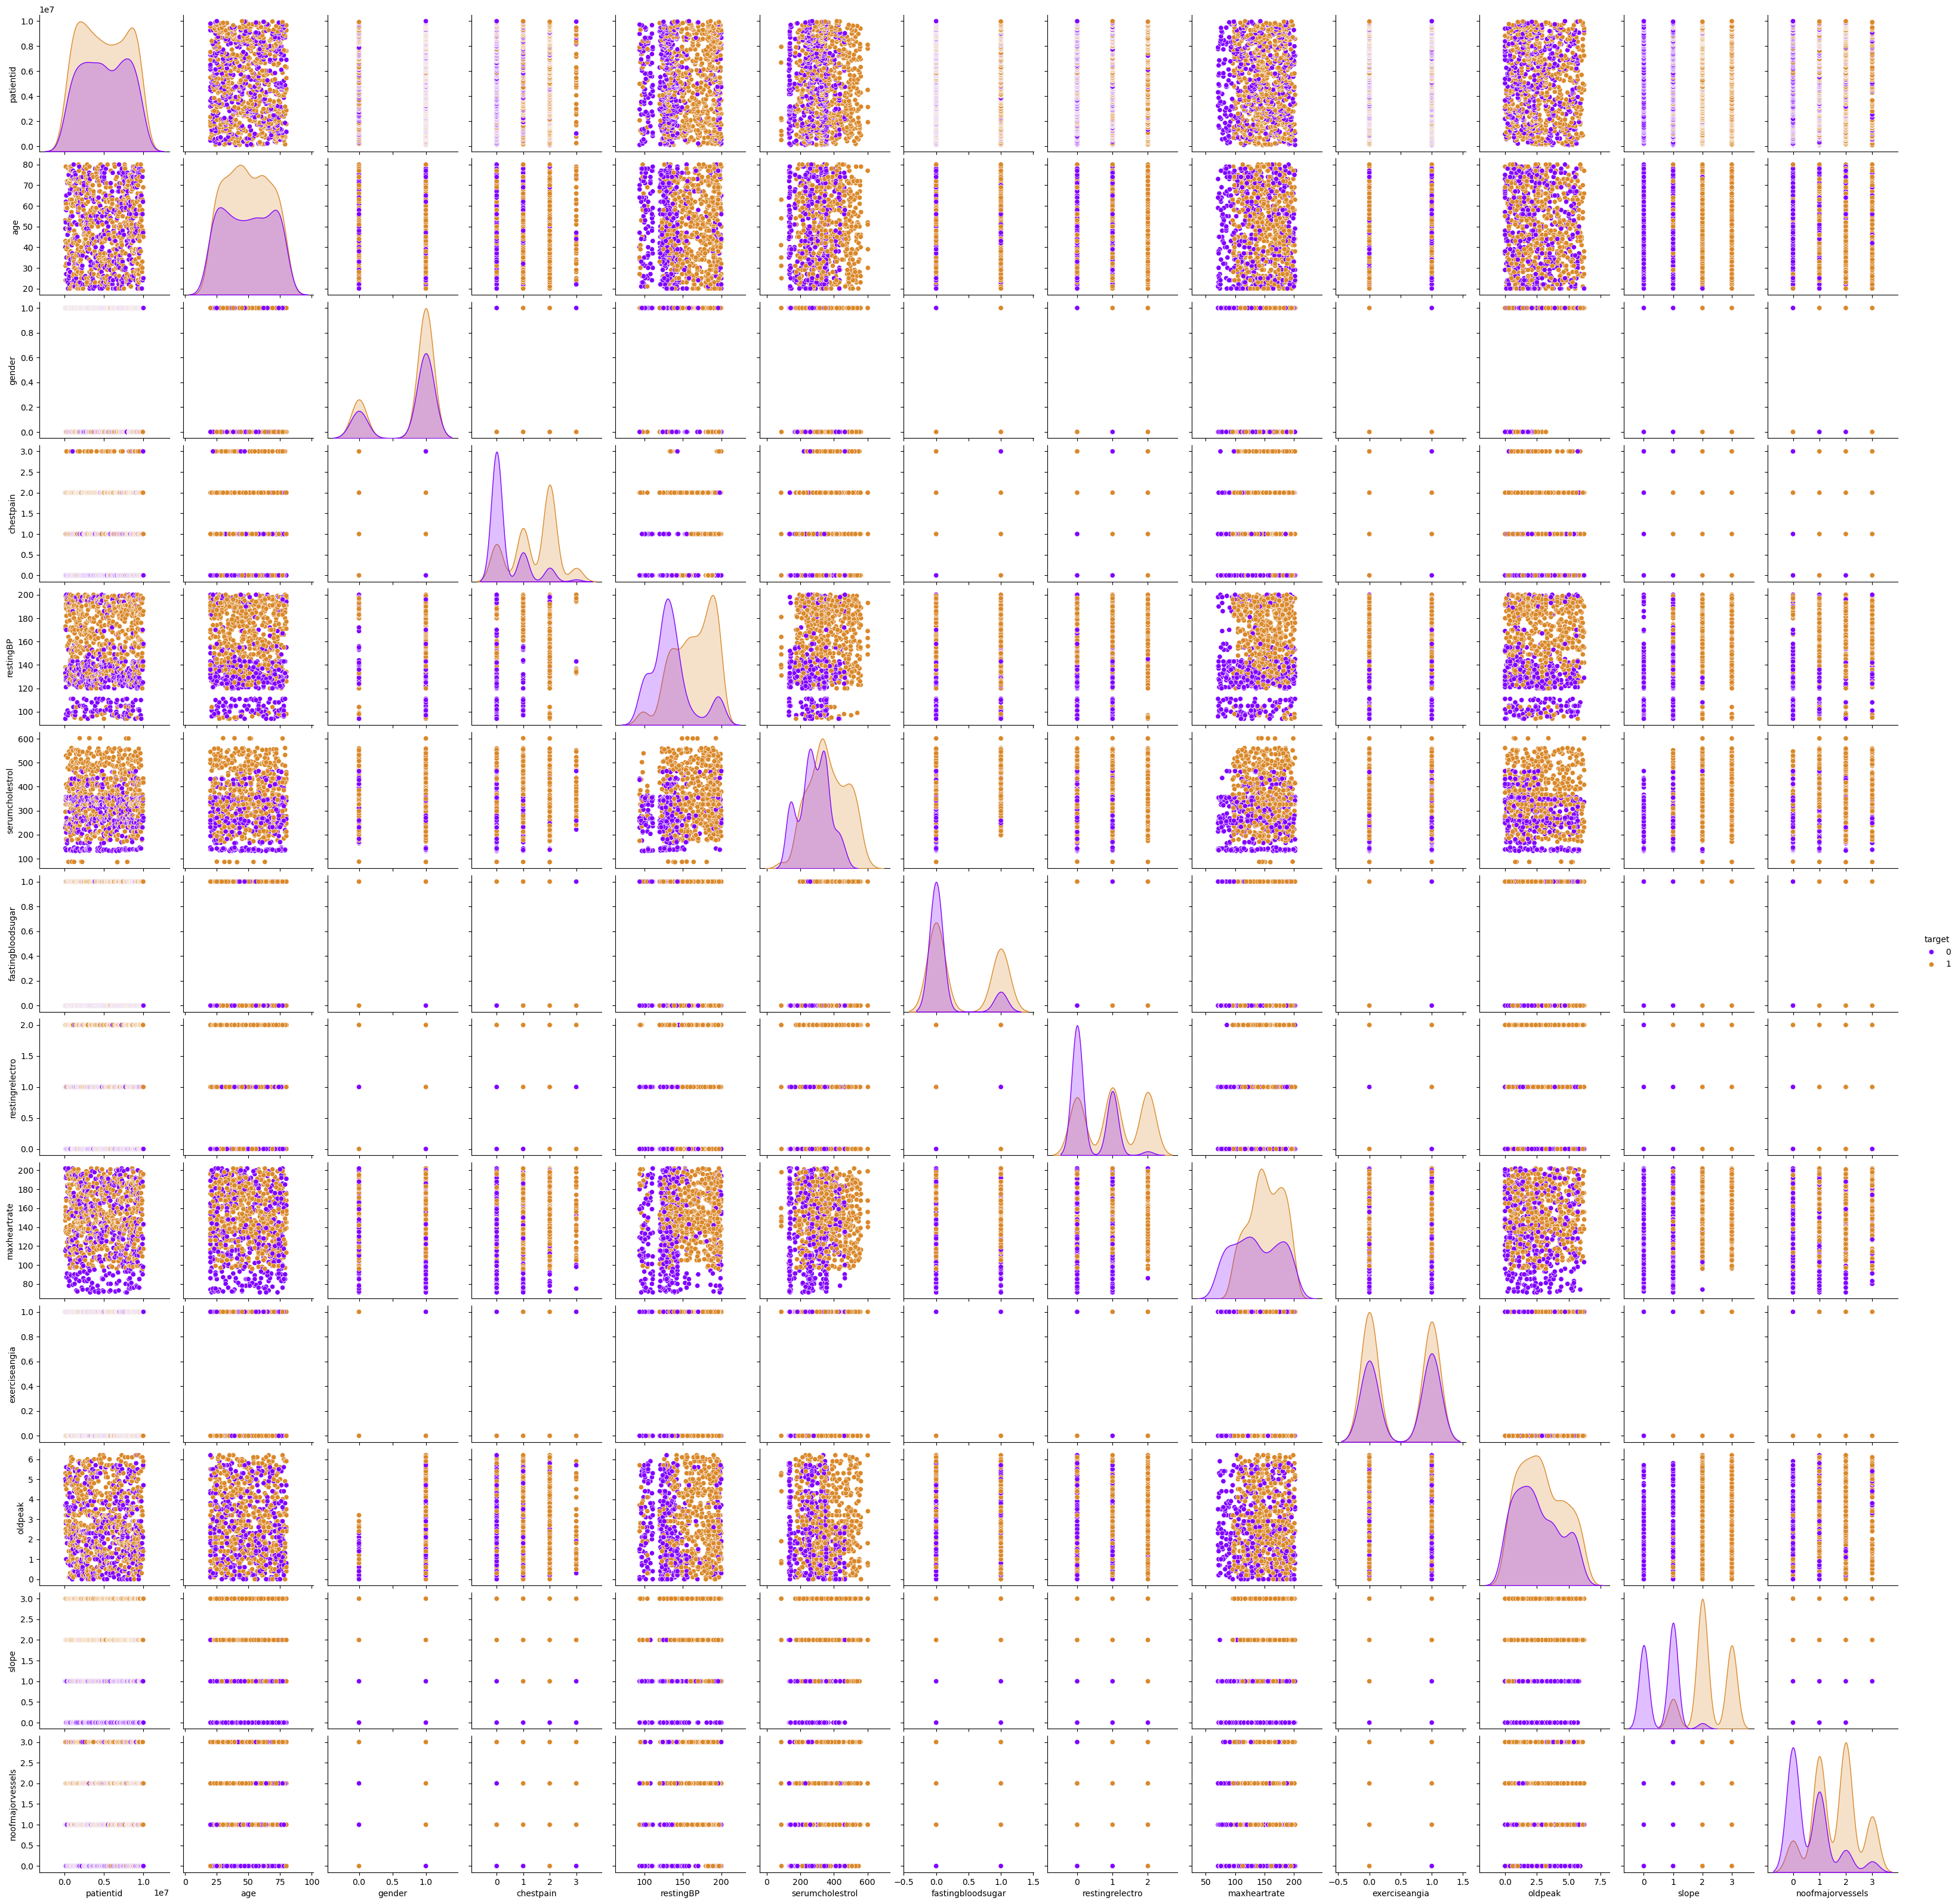

In [24]:
# Pair plot according to target variable
sns.pairplot(data,hue='target',palette = ["#8000ff","#da8829"])
plt.show()

In [25]:
# Creating a copy of data
new_data = data

# Define the columns to be encoded and scaled
cat_cols = ['gender','chestpain','fastingbloodsugar','restingrelectro','exerciseangia','slope','noofmajorvessels']
con_cols = ['age','restingBP','serumcholestrol','maxheartrate','oldpeak']

# Encoding the categorical columns
new_data = pd.get_dummies(new_data, columns = cat_cols, drop_first = True)
new_data.head()

patientid  age  restingBP  serumcholestrol  maxheartrate  oldpeak  target  \
0     103368   53        171              326           147      5.3       1   
1     119250   40         94              229           115      3.7       0   
2     119372   49        133              142           202      5.0       0   
3     132514   43        138              295           153      3.2       1   
4     146211   31        199              326           136      5.3       1   

   gender_1  chestpain_1  chestpain_2  ...  fastingbloodsugar_1  \
0      True        False         True  ...                False   
1      True        False        False  ...                False   
2      True        False         True  ...                False   
3      True        False        False  ...                 True   
4      True         True        False  ...                False   

   restingrelectro_1  restingrelectro_2  exerciseangia_1  slope_1  slope_2  \
0               True              False            False    False    False   
1               True              False            False     True    False   
2              False              False             True     True    False   
3               True              False            False    False     True   
4              False               True            False    False    False   

   slope_3  noofmajorvessels_1  noofmajorvessels_2  noofmajorvessels_3  
0     True               False               False                True  
1    False                True               False               False  
2    False               False               False               False  
3    False               False                True               False  
4     True               False                True               False  

[5 rows x 21 columns]